In [3]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy

In [7]:
with h5py.File('train_catvnoncat.h5.', 'r') as file:
    # Access the image data and labels
    x_train_orig = np.array(file['train_set_x'])
    y_train_orig = np.array(file['train_set_y'])

with h5py.File('test_catvnoncat.h5.', 'r') as file:
    # Access the image data and labels
    x_test_orig = np.array(file['test_set_x'])
    y_test_orig = np.array(file['test_set_y'])

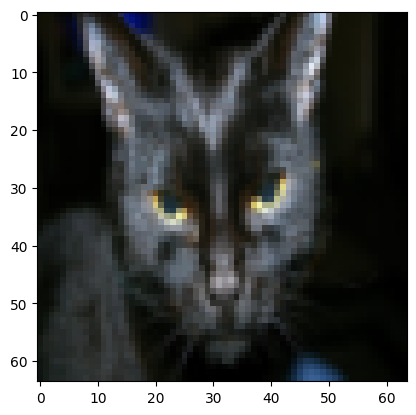

In [13]:
#show picture of cat
plt.imshow(x_train_orig[25])
plt.show()

In [14]:
#shape of the data both test and train

print(f"shape input  training data:{x_train_orig.shape}")
print(f"shape out training data:{y_train_orig.shape}")
print(f"shape of each image:{x_train_orig.shape[1:]}")
print(f"shape testining data:{x_test_orig.shape}")
print(f"shape out testing data:{y_test_orig.shape}")

shape input  training data:(209, 64, 64, 3)
shape out training data:(209,)
shape of each image:(64, 64, 3)
shape testining data:(50, 64, 64, 3)
shape out testing data:(50,)


In [91]:
#reshaping of data 

x_train = x_train_orig.reshape(209,-1)
x_test = x_test_orig.reshape(50,-1)
x_train = x_train/255
x_test = x_test/255

In [92]:
print(f"Shape of training  data:{x_train.shape}")
print(f"Shape of testing  data:{x_test.shape}")

Shape of training  data:(209, 12288)
Shape of testing  data:(50, 12288)


In [172]:
#wrost
import numpy as np

def sigmoid(W, X, B):
    z = np.dot(W, X.T) + B
    return 1 / (1 + np.exp(-z))

def cost(a, y):
    epsilon = 1e-15
    return -(np.sum(y * np.log(a + epsilon) + (1 - y) * np.log(1 - a + epsilon)) / x_train.shape[0])

def dW(x_train, y, a):
    return np.dot(y - a, x_train) / x_train.shape[0]

def dB(y, a):
    return np.sum(y - a) / x_train.shape[0]

def model(W, B, x_train, alpha, y):
    costs = []
    for i in range(1000):
        a = sigmoid(W, x_train, B)
        W = W - alpha * dW(x_train, y, a)
        B = B - alpha * dB(y, a)
        costs.append(cost(a, y))

    return W, B, costs

# Example usage


In [176]:
W = np.zeros((1,x_train.shape[1]))
B = 10
W,B,costs = model(W,B,x_train,0.01,y_train_orig)

In [177]:
W

array([[2.39178142, 2.59574051, 2.21896973, ..., 2.17506318, 2.3420582 ,
        1.69246634]])

In [178]:
B

16.555023468373502

In [155]:
#best 


def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_function(y, a):
    epsilon = 1e-15
    cost = -(np.sum(y * np.log(a + epsilon) + (1 - y) * np.log(1 - a + epsilon)) / a.shape[1])
    return cost

def gradient_descent(X, y, alpha, epochs):
    m, n = X.shape
    W = np.zeros((1, n))
    B = 0
    costs = []

    for epoch in range(epochs):
        # Forward pass
        z = np.dot(W, X.T) + B
        a = sigmoid(z)

        # Compute cost
        cost = cost_function(y, a)
        costs.append(cost)

        # Backward pass (Gradient Descent)
        dz = a - y
        dW = np.dot(dz, X) / m
        dB = np.sum(dz) / m

        # Update parameters
        W -= alpha * dW
        B -= alpha * dB

        if epoch % 1000 == 0:
            print(f"Epoch {epoch}, Cost: {cost}")

    return W, B, costs





In [156]:
W,B,costs = gradient_descent(x_train,y_train_orig,0.01,10000)

Epoch 0, Cost: 0.6931471805599435
Epoch 1000, Cost: 0.116478331257165
Epoch 2000, Cost: 0.0698603560508186
Epoch 3000, Cost: 0.049484807864779885
Epoch 4000, Cost: 0.03811122006611572
Epoch 5000, Cost: 0.030898126764841924
Epoch 6000, Cost: 0.02593572199213205
Epoch 7000, Cost: 0.02232225160390515
Epoch 8000, Cost: 0.019578306706278387
Epoch 9000, Cost: 0.017426330533711724


In [157]:
W

array([[ 0.02391531, -0.05507692, -0.0226154 , ..., -0.02647264,
        -0.05637545,  0.06131817]])

In [158]:
B

-0.002560020102160863

In [160]:
y_pred = sigmoid(np.dot(W, x_test.T) + B)

In [166]:
y_out = [ 0 if i<0.5 else 1 for i in y_pred.flatten()]

In [170]:
accuracy = np.sum(y_out==y_test_orig)/50*100

In [171]:
print(f"accuracy of model:{accuracy}")

accuracy of model:72.0


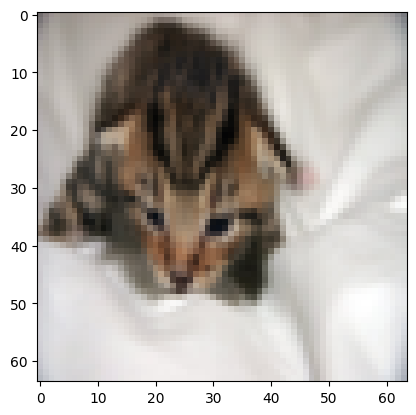

it is cat:True


In [180]:
plt.imshow(x_test[1].reshape(64,64,3))
plt.show()
out = y_out[1]==1
print(f"it is cat:{out}")